You now know two kinds of regression and two kinds of classifier. So let's use that to compare models!

Comparing models is something data scientists do all the time. There's very rarely just one model that would be possible to run for a given situation, so learning to choose the best one is very important.

Here let's work on regression. Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

%matplotlib inline
#pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

c:\users\david\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Loading the data
data = pd.read_csv('C:\\Users\\david\Desktop\\thinkful datasets\\2017.csv')

data.head(5)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [3]:
#Keeping only the columns we need for the model

needed_data = data.loc[:, ['Happiness.Score','Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.','Freedom', 'Generosity', 'Trust..Government.Corruption.']]
needed_data.columns = ['Happiness_Score','Economy', 'Family', 'Life Expectancy', 'Freedom', 'Generosity', 'Government Trust']

needed_data.head(5)

,Happiness_Score,Economy,Family,Life Expectancy,Freedom,Generosity,Government Trust
0,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
1,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770
2,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527
3,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007
4,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612


#### Build a Model that Predicts the Happiness of a Country

$$ Happiness = \alpha + Economy + Family + Life Expectancy + Freedom + Generosity + Government Trust $$

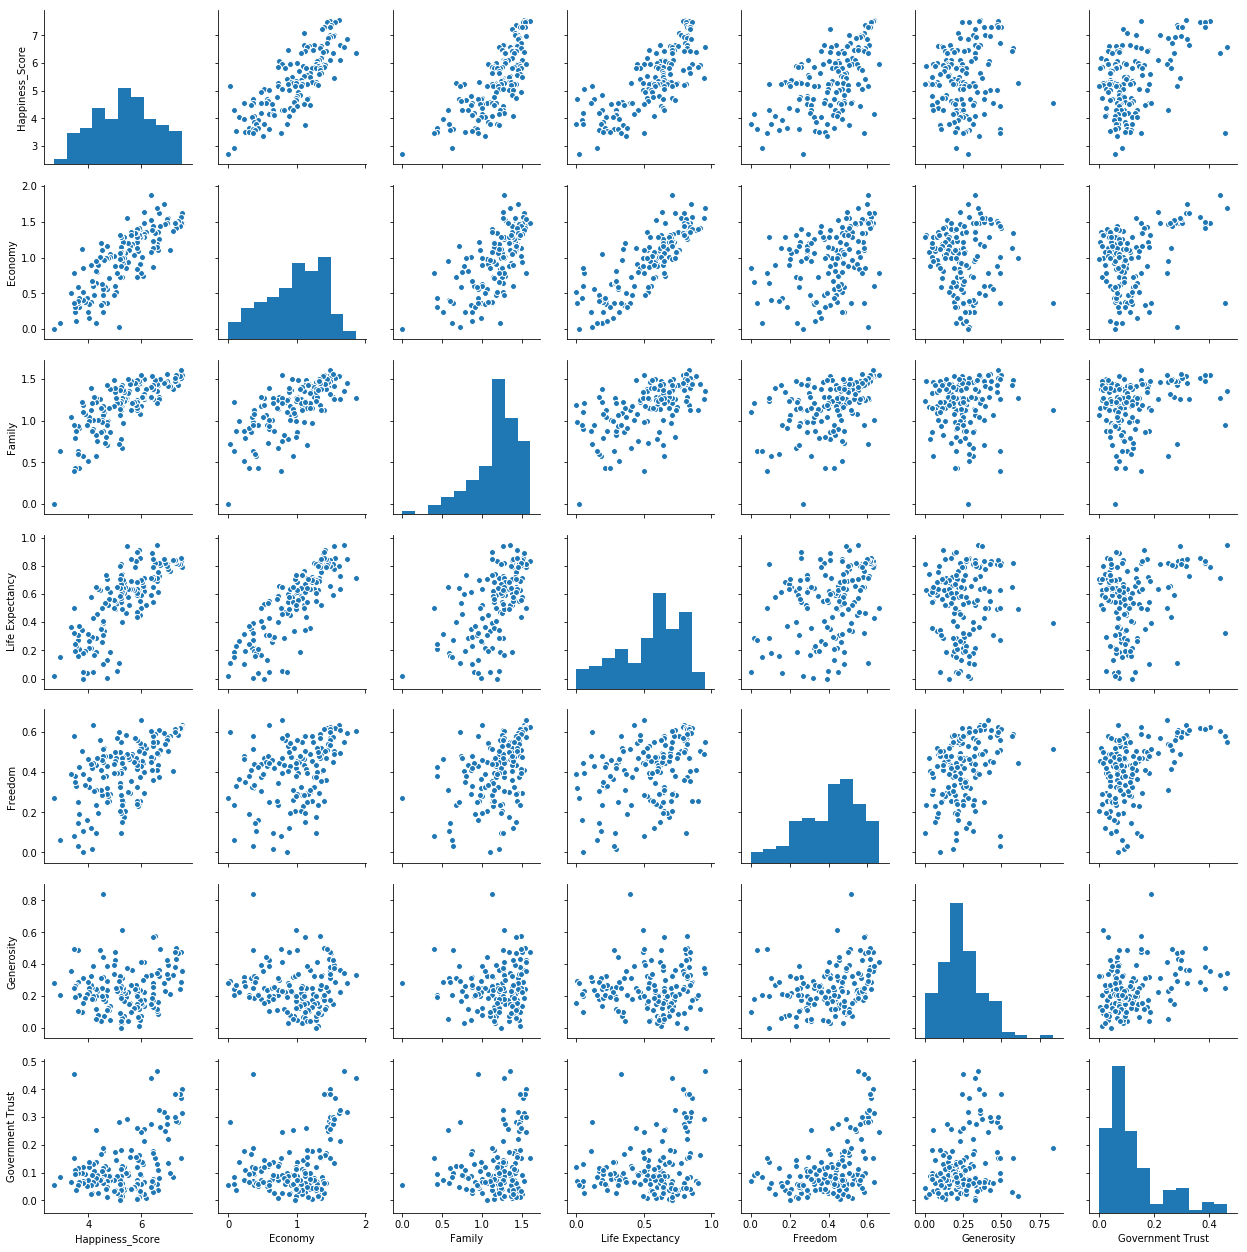

In [4]:
sns.pairplot(needed_data)

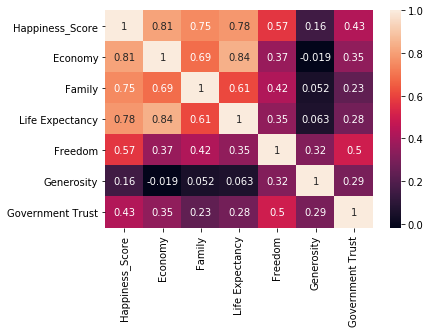

In [5]:
sns.heatmap(needed_data.corr(), annot=True)

### To make the variables more normally distributed I will performs some transformations 

We will start by taking the square root of the following: 
- Government Trust
- Generosity 
- Freedom
We do this because the data is skewed to the right and we are working to get them normally distributed

In [6]:
score = cross_val_score(regr, X, Y, cv=5)
print(" Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

NameError: name 'regr' is not defined

In [ ]:
linear_formula = 'Happiness_Score ~ sqr_lifeexp+sqr_family+sqrt_freedom+sqrt_generosity+sqrt_gov_trust'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=needed_data).fit()
needed_data.head(5)

In [ ]:
lm.pvalues

In [ ]:
# Assumption two: multivariate normality

predicted = regr.predict(X).ravel()
actual = needed_data["Happiness_Score"]
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [ ]:

# Assumption three: homoscedasticity# Assump 
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

### K- Nearest Neighbor Regression

In [ ]:
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
Y = needed_data['Happiness_Score'].values.reshape(-1, 1)
X = needed_data[['Economy', 'sqr_lifeexp','sqr_family','sqrt_freedom','sqrt_generosity','sqrt_gov_trust']]

# Build our model.

knn.fit(X, Y)

#y_pred = knn.predict(X)

print('\nR-squared:')
print('%.3f' % (knn.score(X, Y)) )

knn_score = cross_val_score(knn, X, Y, cv=5)
print("\nAccuracy: %0.2f (+/- %0.2f)" % (knn_score.mean(), knn_score.std() * 2))

### Let's now weight the KNN scores

In [ ]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
Y = needed_data['Happiness_Score'].values.reshape(-1, 1)
X = needed_data[['Economy', 'sqr_lifeexp','sqr_family','sqrt_freedom','sqrt_generosity','sqrt_gov_trust']]

# Build our model.

knn_w.fit(X, Y)

#y_pred = knn_w.predict(X)

print('\nR-squared:')
print('%.3f' % (knn_w.score(X, Y)) )

knnw_score = cross_val_score(knn_w, X, Y, cv=5)
print("\nAccuracy: %0.2f (+/- %0.2f)" % (knnw_score.mean(), knnw_score.std() * 2))
